In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data['Departure Delay in Minutes'].value_counts()

Departure Delay in Minutes
0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
426        1
465        1
321        1
692        1
337        1
Name: count, Length: 446, dtype: int64

In [4]:
data['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
data_fix = data.drop(['Unnamed: 0'], axis=1)

In [7]:
data_fix = data_fix.drop(['id'], axis=1)

In [8]:
data_fix.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
data_fix.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


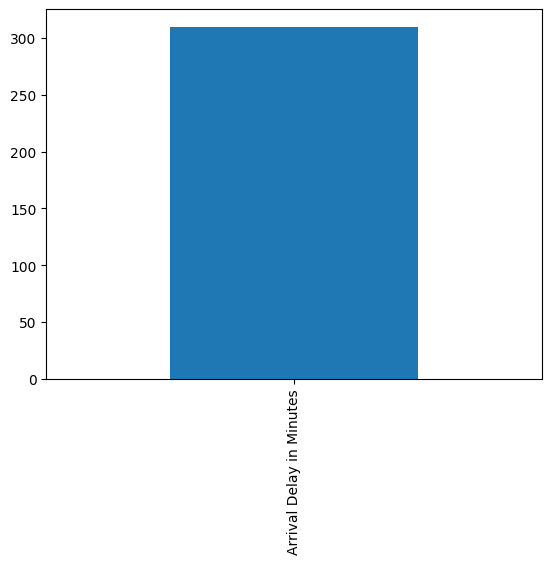

In [11]:
# Визуализация пропущенных данных
missing = data_fix.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace =True)
missing.plot.bar()
plt.show()

In [12]:
#Заполнение пропущенных данных медианой
df_fix = data_fix.fillna(data_fix['Arrival Delay in Minutes'].median())

In [13]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [14]:
df_numeric_features = df_fix.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
df_numeric_features.shape

(103904, 18)

In [16]:
df_categorical_features = df_fix.select_dtypes(include=[object])

df_categorical_features.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [17]:
df_categorical_features.shape

(103904, 5)

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

df_numcols_norm = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:19]),
columns = df_numeric_features.iloc[:,0:19].columns.tolist())
df_numcols_norm.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


In [19]:
for col in df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col], prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables], axis = 1)
    df_categorical_features.drop([col], axis = 1, inplace = True)

In [20]:
df_new_data = pd.concat([df_numcols_norm, df_categorical_features], axis = 1)

In [21]:
pd.set_option('display.max_columns', None)
df_new_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,False,True,True,False,False,True,False,False,True,True,False
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,False,True,False,True,True,False,True,False,False,True,False
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,True,False,True,False,True,False,True,False,False,False,True
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,True,False,True,False,True,False,True,False,False,True,False
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,False,True,True,False,True,False,True,False,False,False,True


In [22]:
df_new_data.rename(columns = {'satisfaction_neutral or dissatisfied':'satisfaction_0'}, inplace = True)

In [23]:
df_new_data.rename(columns = {'satisfaction_satisfied':'satisfaction_1'}, inplace = True)

In [24]:
df_new_data.replace({False: 0, True: 1}, inplace=True)

In [25]:
df_new_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_0,satisfaction_1
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0,1,1,0,0,1,0,0,1,1,0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0,1,0,1,1,0,1,0,0,1,0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1,0,1,0,1,0,1,0,0,0,1
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,1,0,1,0,1,0,1,0,0,1,0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,0,1,1,0,1,0,1,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
df_new_data_2 = df_new_data.drop('satisfaction_0', axis=1)
X = df_new_data_2.drop('satisfaction_1', axis=1)
y = df_new_data_2["satisfaction_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

<Axes: >

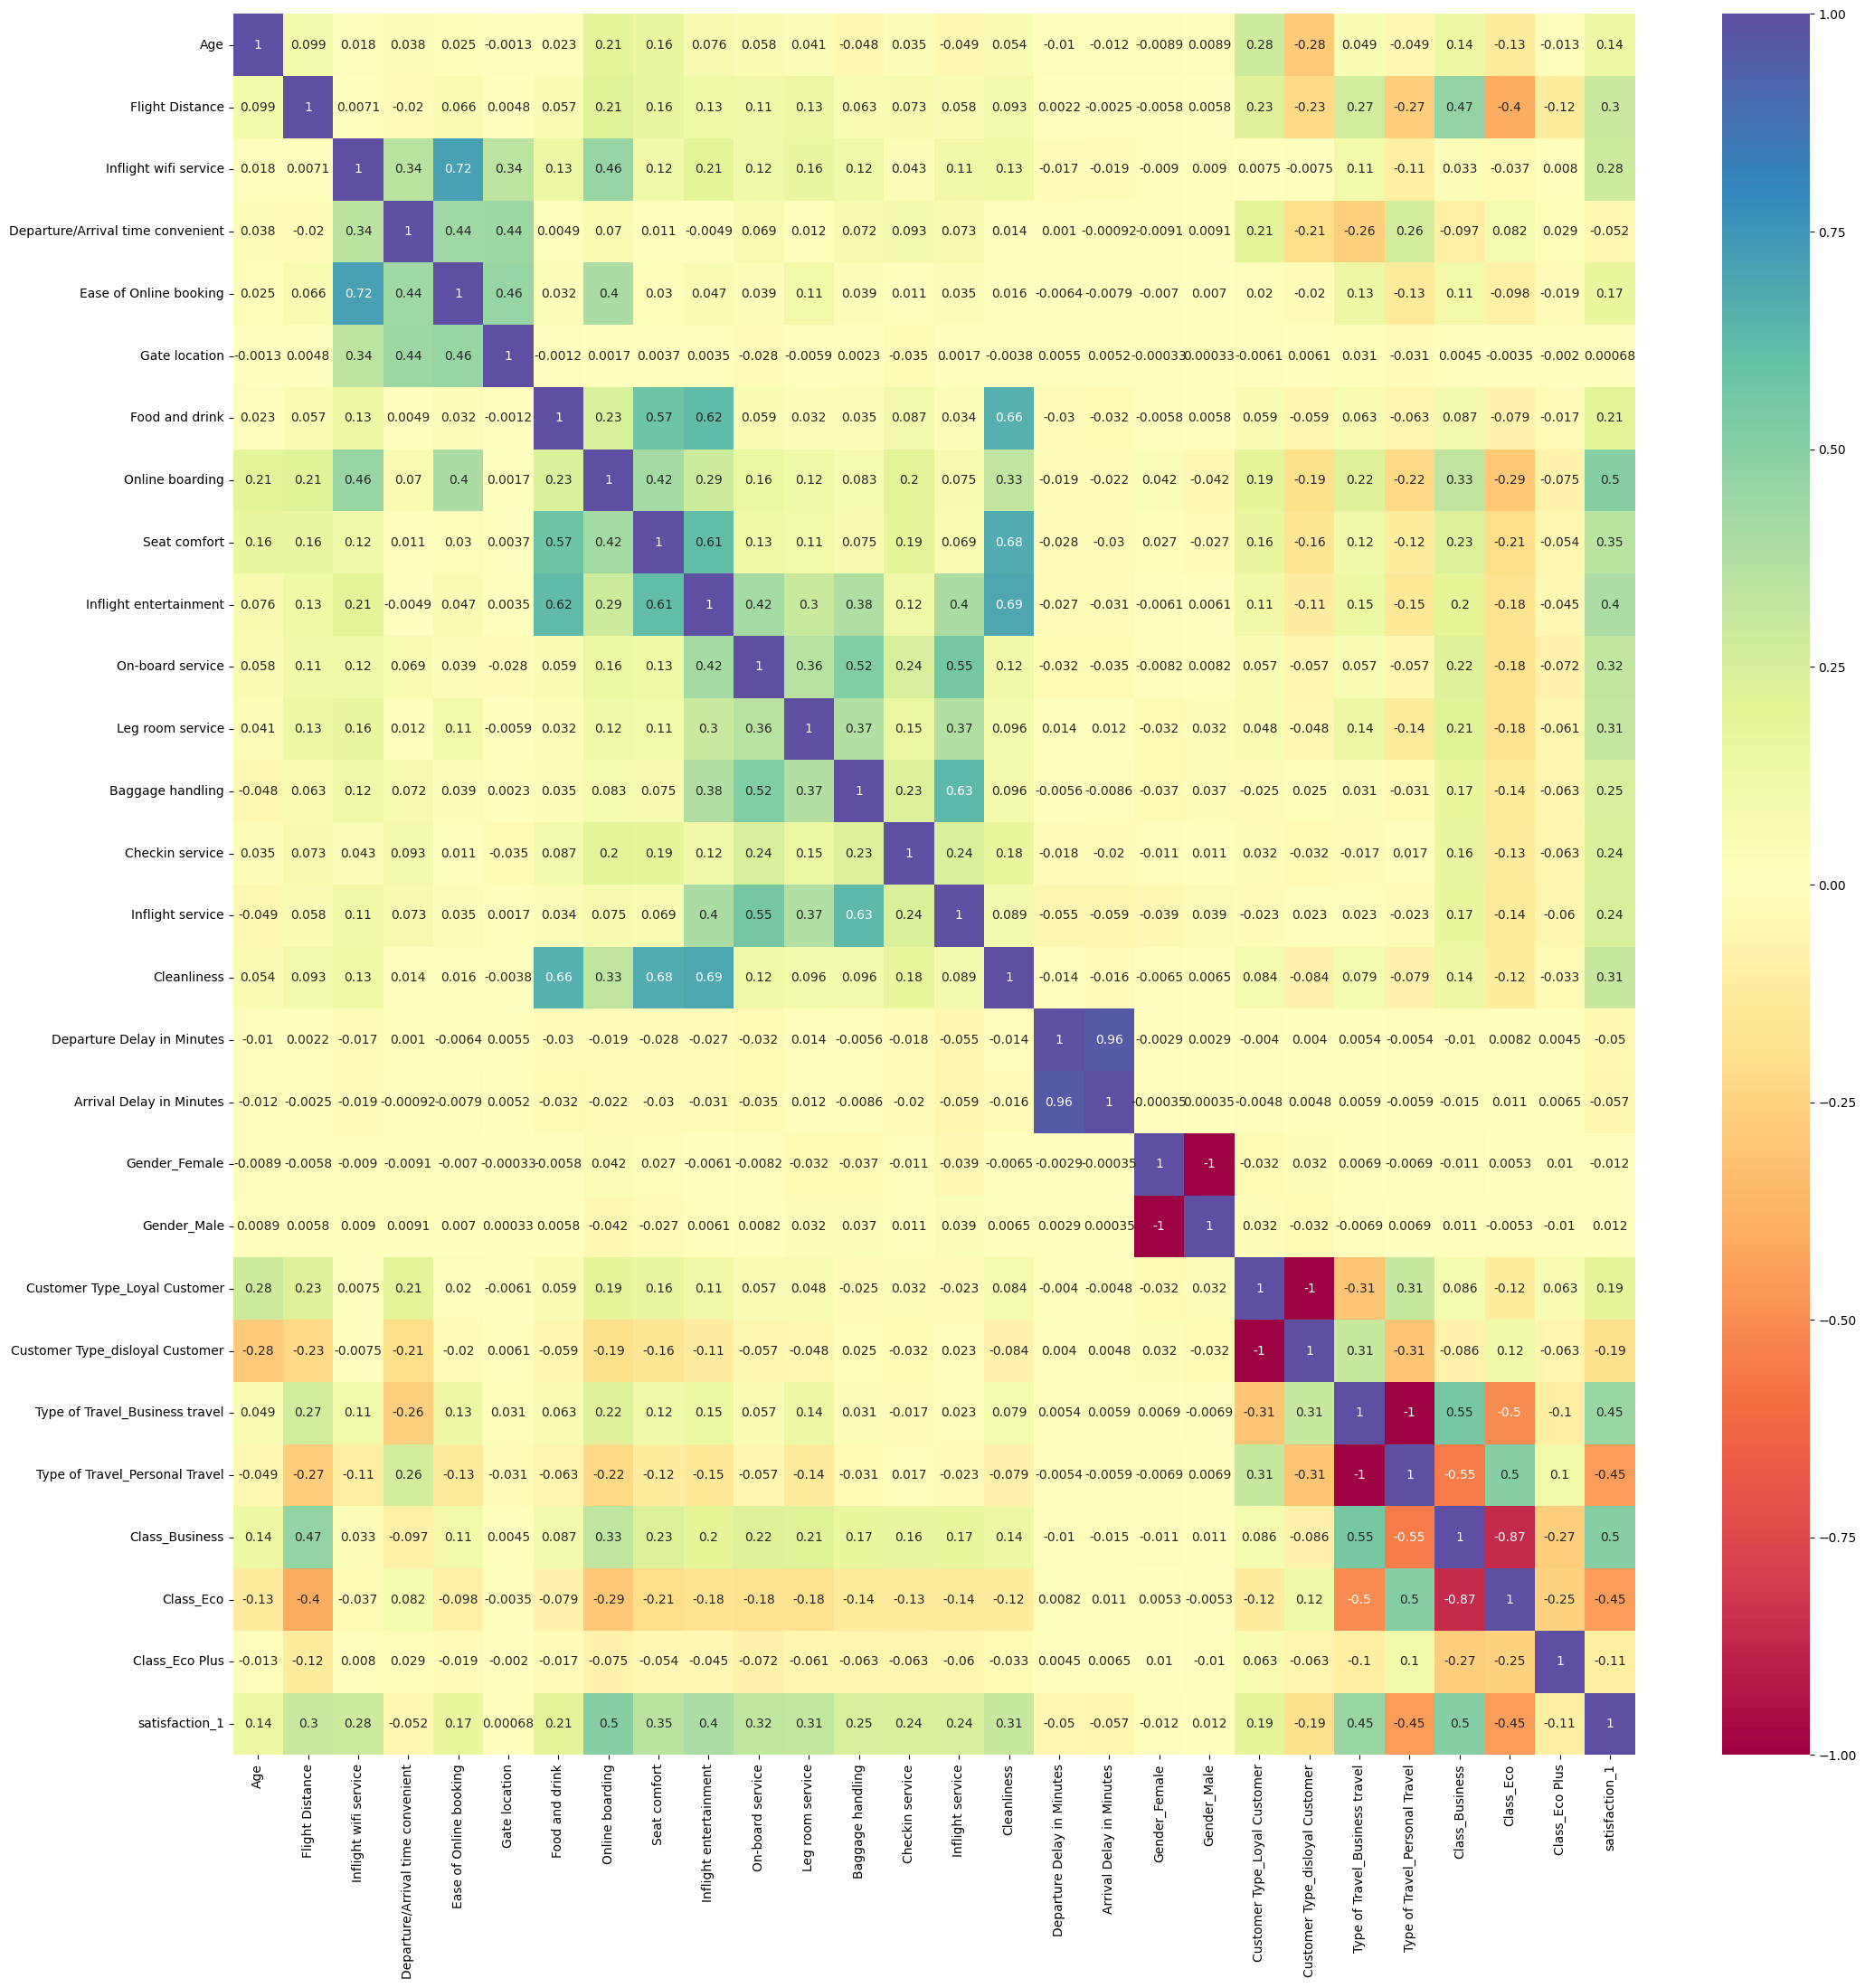

In [27]:
import seaborn as sns
corr_matrix = df_new_data_2.corr()

#Матрица корреляции
plt.figure(figsize=(25,25))

sns.heatmap(corr_matrix,cmap='Spectral', annot = True)

<Axes: >

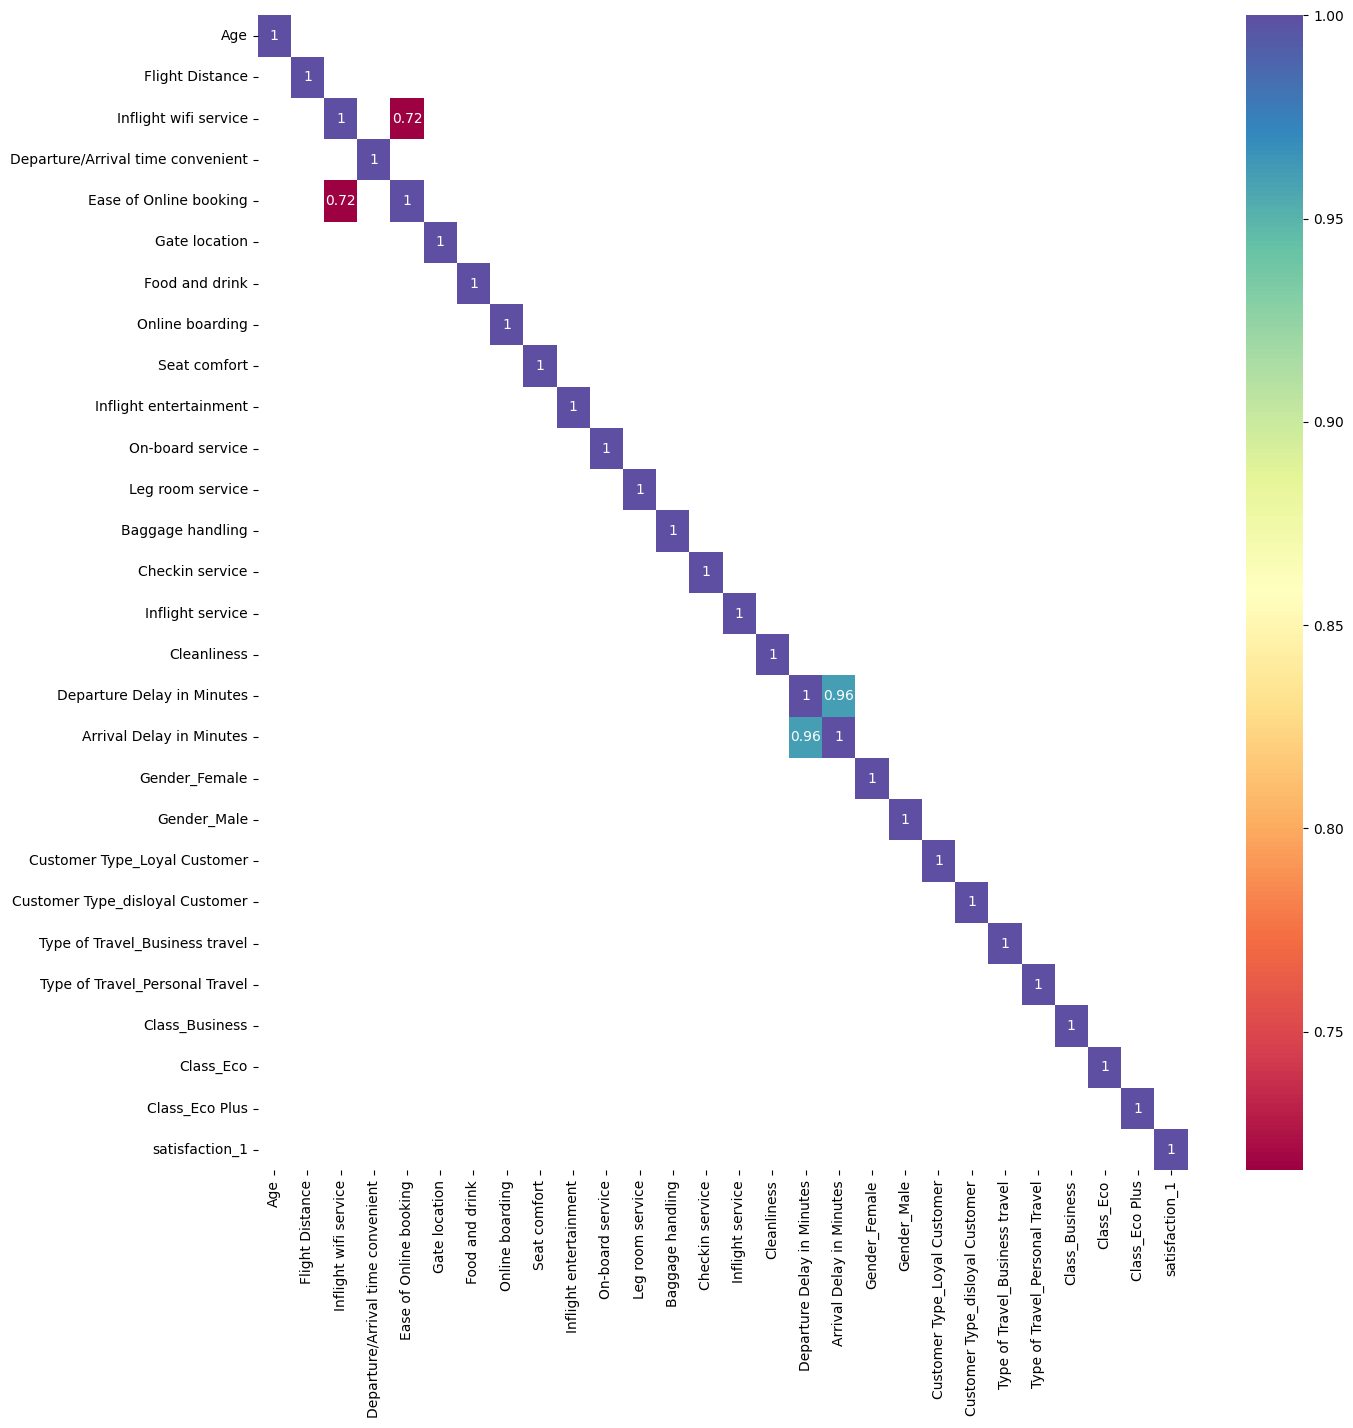

In [28]:
#Фильтруем значения корреляции, больше 0.7
filter_corr = corr_matrix[corr_matrix > 0.7]

plt.figure(figsize=(15,15))

sns.heatmap(filter_corr,cmap='Spectral', annot = True)

<Axes: >

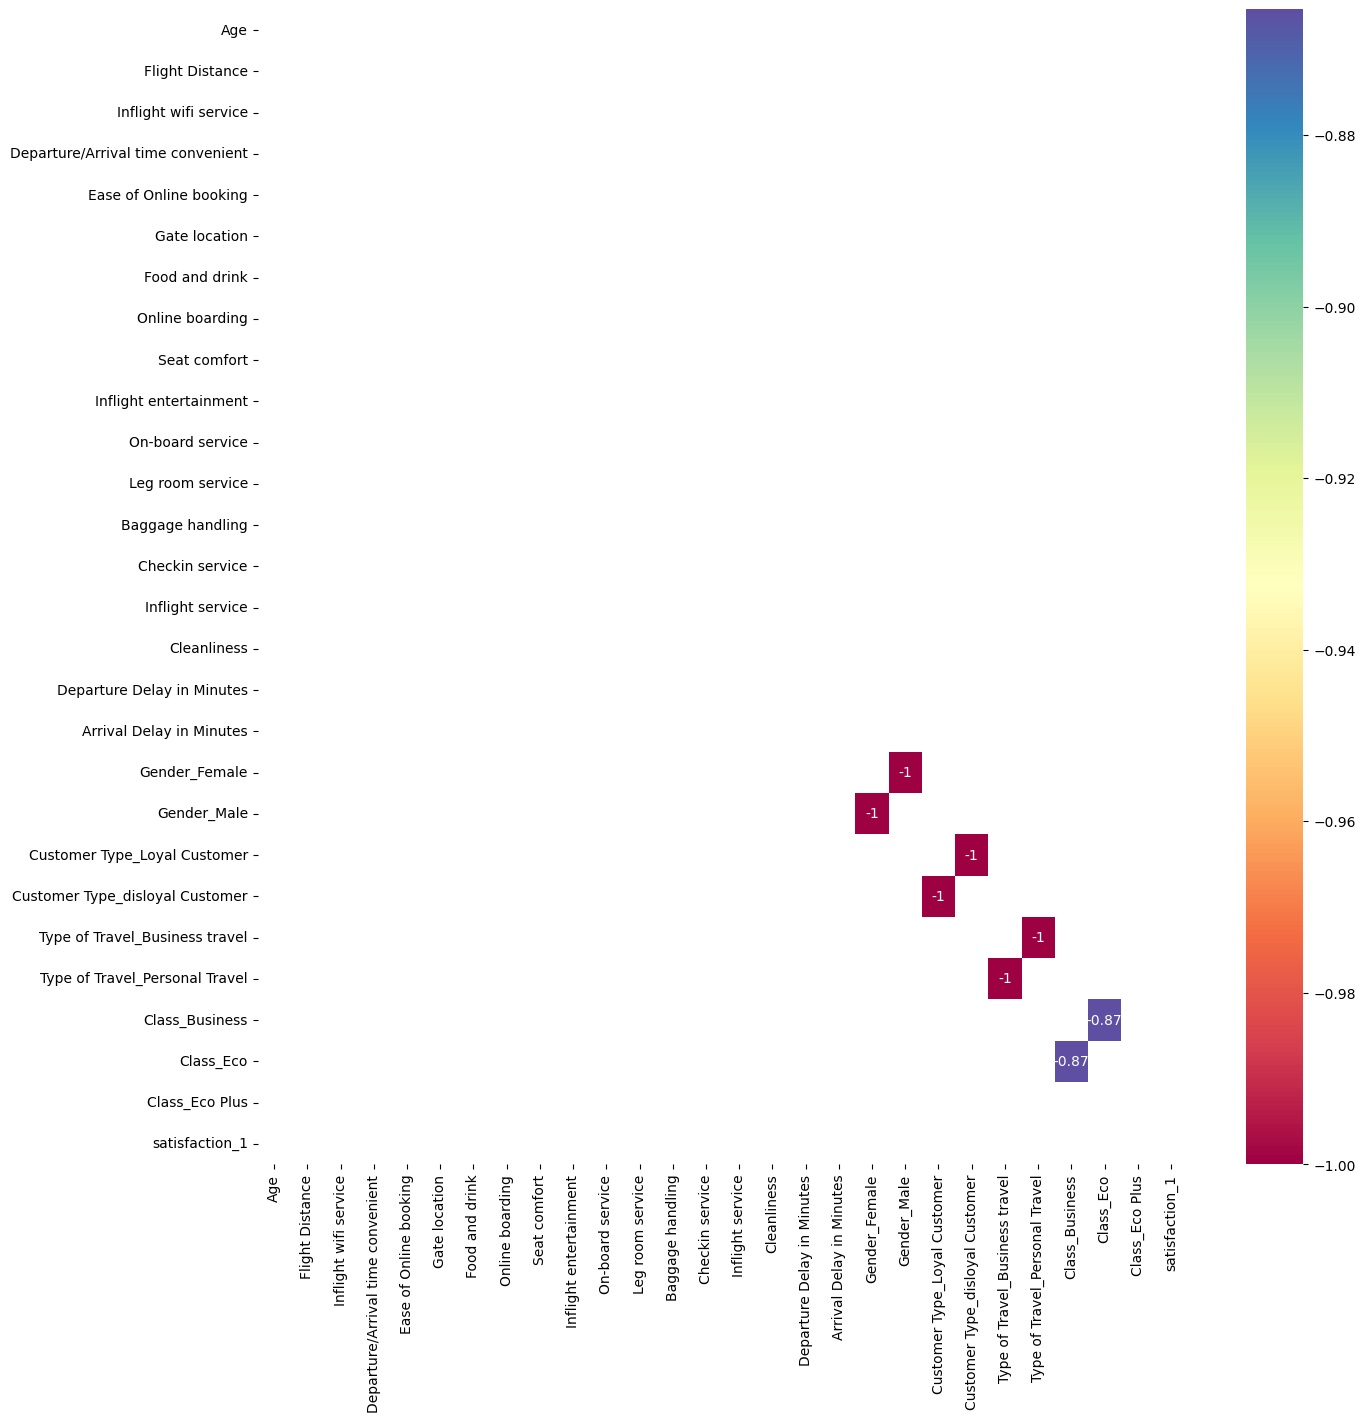

In [29]:
#Фильтруем значения корреляции меньше 0.7
filter_corr = corr_matrix[corr_matrix < -0.7]

plt.figure(figsize=(15,15))

sns.heatmap(filter_corr,cmap='Spectral', annot = True)

In [30]:
X_train.shape, X_test.shape

((69615, 27), (34289, 27))

In [31]:
# Блок обучения модели логистической регрессии
from sklearn.linear_model import LogisticRegression
# Инициализация модели
logreg = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [32]:
y_pred_test = logreg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8756


In [34]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8749
Test set score: 0.8756


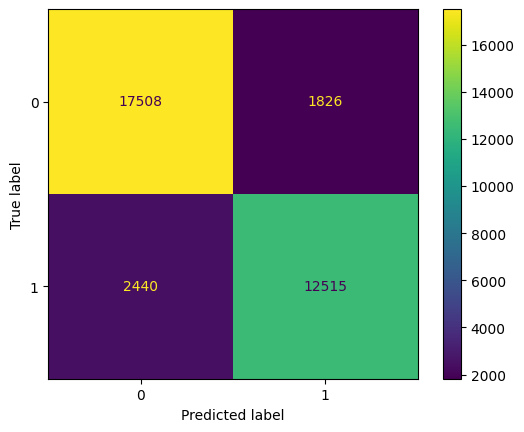

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     19334
           1       0.87      0.84      0.85     14955

    accuracy                           0.88     34289
   macro avg       0.88      0.87      0.87     34289
weighted avg       0.88      0.88      0.88     34289



<Axes: ylabel='Feature'>

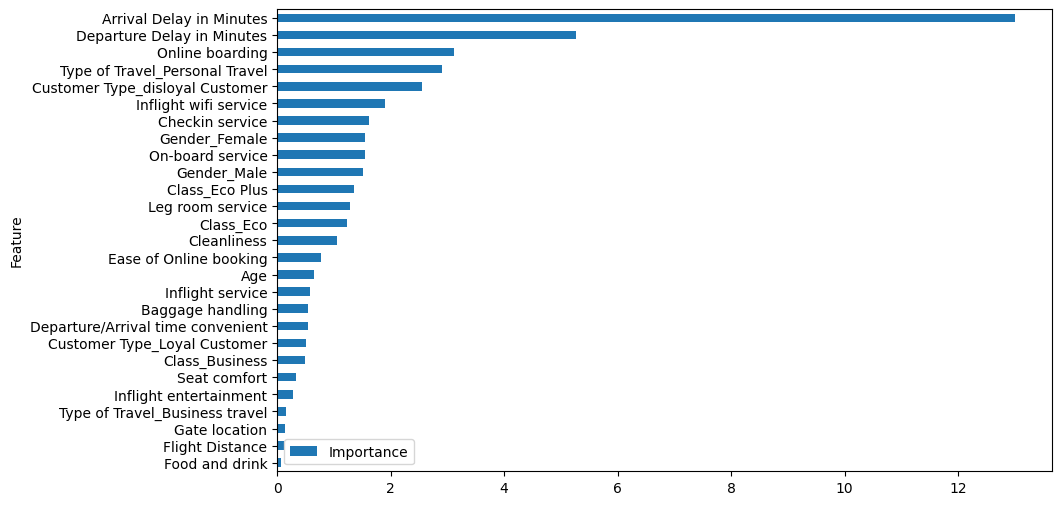

In [37]:
coefficients = logreg.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))